<a href="https://colab.research.google.com/github/Drew128/Iowa_liquor_sales-EDA-/blob/stage/Iowa_liquor_sales(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [116]:
print('Get a sample to save time')

Get a sample to save time


In [0]:
%%bigquery --project project_id df
SELECT 
  *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
LIMIT 1000000

In [118]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-19607500040,2019-05-24,3514,Karen's Spirits and Wine,328 2nd Ave S,Fort Dodge,50501,POINT (-94.192501 42.502311),94,WEBSTER,1041300,American Sloe Gins,434,LUXCO INC,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.00,0.52
1,INV-20485000040,2019-07-08,4070,Grieder Beverage Depot,708 13th St,Belle Plaine,52208,POINT (-92.278 41.897054),6,BENTON,1041300,American Sloe Gins,434,LUXCO INC,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.00,0.52
2,INV-00052500097,2016-08-31,2565,Hy-Vee Food Store / Spencer,819 N Grand Ave,Spencer,51301,POINT (-95.14506 43.145897),21,CLAY,1070000,Cocktails / RTD,395,PROXIMO,58842,Jose Cuervo Coconut Pineapple,6,1750,8.20,12.30,3,12.30,5.25,1.38
3,INV-00074900026,2016-08-31,3666,Target Store T-1771 / Cedar Rapids,3400 Edgewood Rd SW,Cedar Rapids,52404,POINT (-91.716111 41.944272),57,LINN,1070000,Cocktails / RTD,395,PROXIMO,58893,Jose Cuervo Sparkling Paloma 4pk Cans,6,800,3.88,5.82,1,34.92,0.80,0.21
4,INV-00016600084,2016-08-29,2573,Hy-Vee Food Store / Muscatine,2400 2nd Ave,Muscatine,52761,POINT (-91.035138 41.451349),70,MUSCATINE,1031000,American Vodka,297,Laird & Company,35918,Five O'clock Vodka,6,1750,7.20,10.80,3,64.80,5.25,1.38


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
invoice_and_item_number    1000000 non-null object
date                       1000000 non-null object
store_number               1000000 non-null object
store_name                 1000000 non-null object
address                    996964 non-null object
city                       996964 non-null object
zip_code                   996964 non-null object
store_location             902765 non-null object
county_number              992340 non-null object
county                     992340 non-null object
category                   989022 non-null object
category_name              983657 non-null object
vendor_number              999998 non-null object
vendor_name                1000000 non-null object
item_number                1000000 non-null object
item_description           1000000 non-null object
pack                       1000000 non-null int64
bottle_volume_ml           1000

In [120]:
import pandas as pd

# check null values in data

pd.isnull(df).any()

invoice_and_item_number    False
date                       False
store_number               False
store_name                 False
address                     True
city                        True
zip_code                    True
store_location              True
county_number               True
county                      True
category                    True
category_name               True
vendor_number               True
vendor_name                False
item_number                False
item_description           False
pack                       False
bottle_volume_ml           False
state_bottle_cost          False
state_bottle_retail        False
bottles_sold               False
sale_dollars               False
volume_sold_liters         False
volume_sold_gallons        False
dtype: bool

In [121]:
# info about columns
for column in df.columns:
  print(f'{column: <25} had a    {df[column].nunique(): <7} unique values    type: {df.dtypes[column]}')

invoice_and_item_number   had a    1000000 unique values    type: object
date                      had a    1901    unique values    type: object
store_number              had a    2237    unique values    type: object
store_name                had a    2369    unique values    type: object
address                   had a    3456    unique values    type: object
city                      had a    822     unique values    type: object
zip_code                  had a    481     unique values    type: object
store_location            had a    1781    unique values    type: object
county_number             had a    108     unique values    type: object
county                    had a    200     unique values    type: object
category                  had a    86      unique values    type: object
category_name             had a    82      unique values    type: object
vendor_number             had a    217     unique values    type: object
vendor_name               had a    303     unique v

In [122]:
from collections import Counter

date = df['date'].unique()
date.sort()
# days delay between records & it`s frequency 
# 1 day delay means that we have day per day dates
print('Delays between records, days:', Counter(abs(date[i]-date[i+1]).days for i, v in enumerate(date[:-1])))
print(f'dates between {min(date)} and {max(date)}')

Delays between records, days: Counter({1: 1468, 3: 213, 4: 175, 2: 36, 5: 8})
dates between 2012-01-03 and 2019-12-31


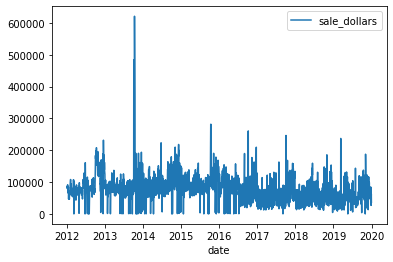

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sum_by_date = df[['date', 'sale_dollars']].groupby('date').sum()
sns.lineplot(data=sum_by_date)

In [0]:
sum_by_date = df[['date', 'sale_dollars']]
sum_by_date['year'] = pd.to_datetime(sum_by_date['date']).dt.year
sum_by_date['month'] = pd.to_datetime(sum_by_date['date']).dt.month
sum_by_date['week'] = pd.to_datetime(sum_by_date['date']).dt.weekday_name

I`m not sure that 2019 is kind of bad years for company, maybe it`s about this small sample of all data


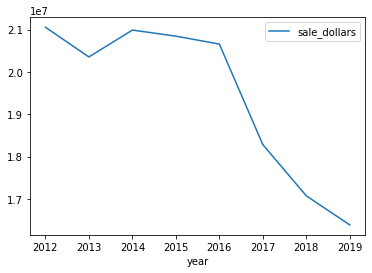

In [148]:
year_sesonality = sum_by_date[['year', 'sale_dollars']].groupby('year').sum()
sns.lineplot(data=year_sesonality)
print('I`m not sure that 2019 is kind of bad years for company, maybe it`s about this small sample of all data')

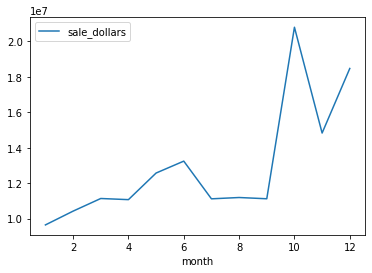

In [126]:
month_sesonality = sum_by_date[['month', 'sale_dollars']].groupby('month').sum()
sns.lineplot(data=month_sesonality)

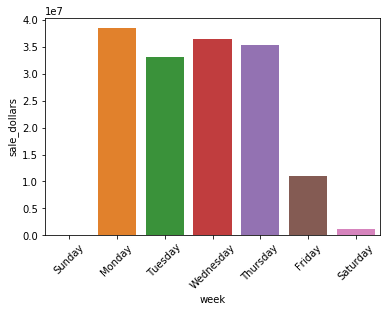

In [127]:
week_sesonality = sum_by_date[['week', 'sale_dollars']].groupby('week').sum()
week_sesonality['week'] = week_sesonality.index
plot = sns.barplot(x=week_sesonality['week'], y=week_sesonality['sale_dollars'], order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
for item in plot.get_xticklabels():
    item.set_rotation(45)

In [128]:
if df['store_number'].nunique() != df['store_name'].nunique():
  numbers_n_names = df[['store_number', 'store_name']]
  print('As we can see, "store_name" and "store_number" connected not like 1 to 1')
  
  print(f'\nThere are {df["store_number"].nunique()} unique values in "store_number" and {df["store_name"].nunique()} values in "store_name"')
  
  numbers_to_one_store_name = numbers_n_names.groupby('store_name').store_number.nunique()
  print('\nLet`s check for few numbers to one "store_name"', numbers_to_one_store_name[numbers_to_one_store_name != 1].head())
  
  names_to_one_store_number = numbers_n_names.groupby('store_number').store_name.nunique()
  print('\nAnd now check for few names to one "store_number"', names_to_one_store_number[names_to_one_store_number != 1].head())
  
  e_g_index_number = names_to_one_store_number[names_to_one_store_number != 1].index[0]
  print(f'\nExample of multinaming for {e_g_index_number}:', numbers_n_names[numbers_n_names['store_number'] == e_g_index_number].store_name.unique())

  e_g_index_name = numbers_to_one_store_name[numbers_to_one_store_name != 1].index[0]
  print(f'\nExample of multinumbering for "{e_g_index_name}":', numbers_n_names[numbers_n_names['store_name'] == e_g_index_name].store_number.unique())



As we can see, "store_name" and "store_number" connected not like 1 to 1

There are 2237 unique values in "store_number" and 2369 values in "store_name"

Let`s check for few numbers to one "store_name" store_name
Abby Lea's                  2
Artisan Grain Distillery    2
B and B West                2
Bani's                      2
Best Trip                   2
Name: store_number, dtype: int64

And now check for few names to one "store_number" store_number
2178    3
2501    2
2522    2
2539    2
2556    2
Name: store_name, dtype: int64

Example of multinaming for 2178: ['Double "D" Liquor Store' '"Double ""D"" Liquor Store"'
 'Double D Liquor Store']

Example of multinumbering for "Abby Lea's": ['4924' '4809']


In [129]:
e_g_index_name = numbers_to_one_store_name[numbers_to_one_store_name != 1].index[0]
numbers_n_names[numbers_n_names['store_name'] == e_g_index_name].store_number.unique()


array(['4924', '4809'], dtype=object)

Let`s look at the top 30 stores by revenue


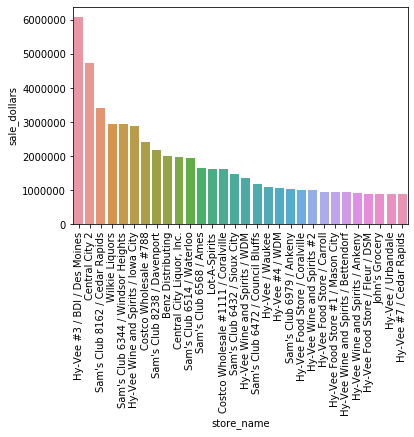

In [130]:
sales_from_stores = df[['store_name', 'sale_dollars']].groupby('store_name').sum()
sales_from_stores['store_name'] = sales_from_stores.index
sales_from_stores_top = sales_from_stores.nlargest(30, 'sale_dollars')
plot = sns.barplot(x=sales_from_stores_top['store_name'], y=sales_from_stores_top['sale_dollars'])
for item in plot.get_xticklabels():
    item.set_rotation(90)
print('Let`s look at the top 30 stores by revenue')

In [131]:
print('Previous block is horrible, so I need to make a function')
def show_top(df, cat, sum_by, top=30):
  top = df[[cat, sum_by]].groupby(cat).aggregate('sum').nlargest(30, sum_by)
  top[cat] = top.index
  plot = sns.barplot(x=top[cat], y=top[sum_by])
  for item in plot.get_xticklabels():
      item.set_rotation(90)

Previous block is horrible, so I need to make a function


Distribution stores by revenue


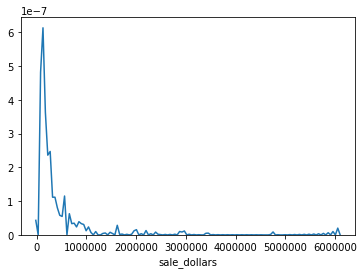

In [132]:
print('Distribution stores by revenue')
sns.distplot(sales_from_stores['sale_dollars'], hist=False)

Describing orders by revenue

count    1000000.00000
mean         155.63676
std          510.94544
min            0.00000
25%           33.74000
50%           79.56000
75%          157.56000
max       111277.80000
Name: sale_dollars, dtype: float64

Distribution orders by revenue


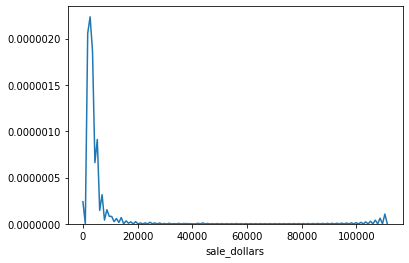

In [133]:
print('Describing orders by revenue\n')
print(df['sale_dollars'].describe())
print('\nDistribution orders by revenue')
sns.distplot(df['sale_dollars'], hist=False)

In [0]:
!pip install geopandas
import geopandas as gpd

In [0]:
gdf = df[['city', 'county', 'store_location']]
gdf.columns = ['City', 'County', 'geometry']
gdf['Longitude'] = gdf['geometry'].str.extract('POINT \(([-0-9\.]+) [-0-9\.]+', expand=True).astype(float).round(2)
gdf['Latitude'] = gdf['geometry'].str.extract('POINT \([-0-9\.]+ ([-0-9\.]+)', expand=True).astype(float).round(2)
gdf = gdf[gdf['geometry'].notna()][['City', 'County', 'Longitude', 'Latitude']].drop_duplicates()

In [136]:
print("Looking for smth anomalous")
print(gdf.Longitude.describe(), end='\n'*2)
print(gdf.Latitude.describe())

Looking for smth anomalous
count    3191.000000
mean      -93.133833
std         1.636958
min       -96.560000
25%       -94.115000
50%       -93.220000
75%       -91.670000
max       -90.180000
Name: Longitude, dtype: float64

count    3191.000000
mean       41.996271
std         0.690301
min        40.390000
25%        41.560000
50%        41.900000
75%        42.500000
max        45.010000
Name: Latitude, dtype: float64


All stores located in North America


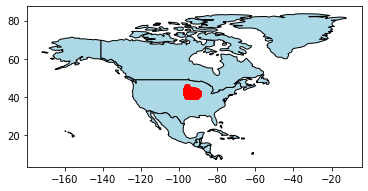

In [137]:
print("All stores located in North America")
worldmap = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.Longitude, gdf.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='lightblue', edgecolor='black')
worldmap.plot(ax=ax, color='red')
plt.show()

Describing volume of bottles

count    1000000.000000
mean         845.319722
std          532.808233
min            0.000000
25%          750.000000
50%          750.000000
75%         1000.000000
max       189000.000000
Name: bottle_volume_ml, dtype: float64

Distribution of bottle`s volume


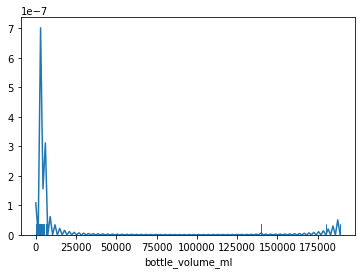

In [138]:
print('Describing volume of bottles\n')
print(df['bottle_volume_ml'].describe())
print('\nDistribution of bottle`s volume')
sns.distplot(df['bottle_volume_ml'], rug=True, hist=False)

In [139]:
print('Seams like outliers')
bottle_volume_ml = bottle_volume_ml[bottle_volume_ml['bottle_volume_ml'] > 6000]
bottle_volume_ml.groupby('bottle_volume_ml').count()

Seams like outliers


,invoice_and_item_number
bottle_volume_ml,
140000,2


In [140]:
df.corr()
print("Lets look at the correlations")
print("Every high correlation in this frame can be logicaly explained")

Lets look at the correlations
Every high correlation in this frame can be logicaly explained


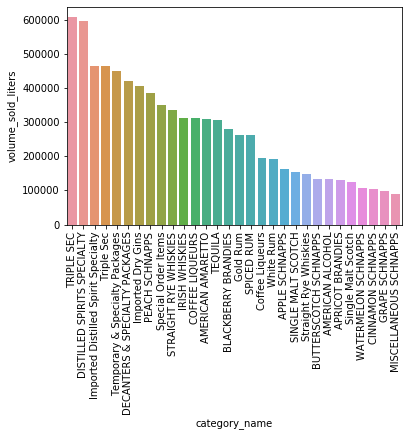

In [141]:
show_top(df=df, cat='category_name', sum_by='volume_sold_liters')

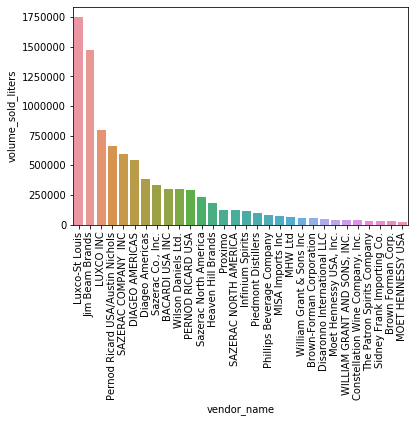

In [142]:
show_top(df=df, cat='vendor_name', sum_by='volume_sold_liters')

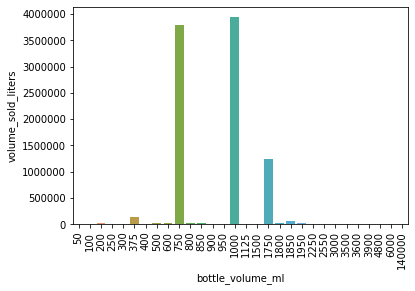

In [143]:
show_top(df=df, cat='bottle_volume_ml', sum_by='volume_sold_liters')

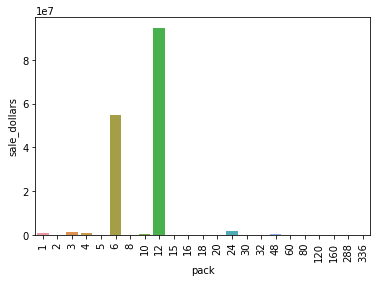

In [144]:
show_top(df=df, cat='pack', sum_by='sale_dollars')

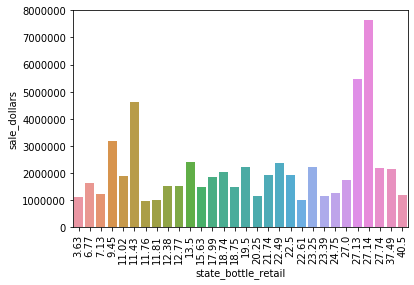

In [145]:
show_top(df=df, cat='state_bottle_retail', sum_by='sale_dollars')

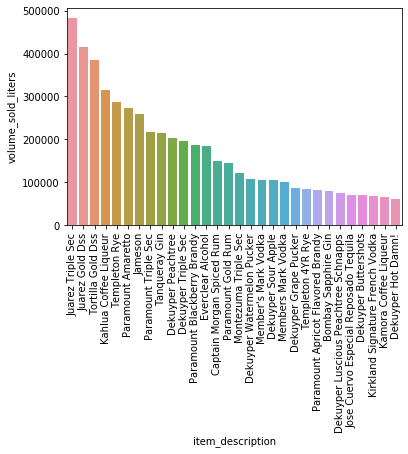

In [146]:
show_top(df=df, cat='item_description', sum_by='volume_sold_liters')

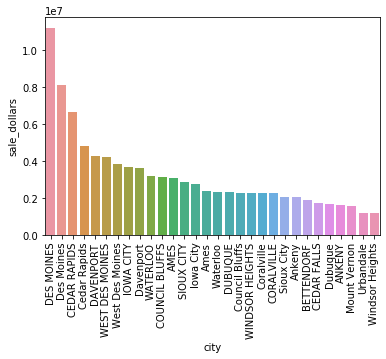

In [147]:
show_top(df=df, cat='city', sum_by='sale_dollars')